In [1]:
from IPython.display import Image

- fsdp 与 deepspeed 均可以作为 Accelerate 的后端
    - 均实现的是：ZeRO

## bitsandbytes

- https://medium.com/@rakeshrajpurohit/model-quantization-with-hugging-face-transformers-and-bitsandbytes-integration-b4c9983e8996
- `load_in_8bit`/`load_in_4bit`
    - will convert the loaded model into mixed-8bit/4bit quantized model.
    - 只能用在推理不能用在训练？？
        - RuntimeError: Only Tensors of floating point and complex dtype can require gradients
    
```
for i, para in enumerate(model.named_parameters()):
    print(f'{i}, {para[0]}\t {para[1].dtype}')
```

### modules

`class Linear8bitLt(nn.Linear):`

## accelerate

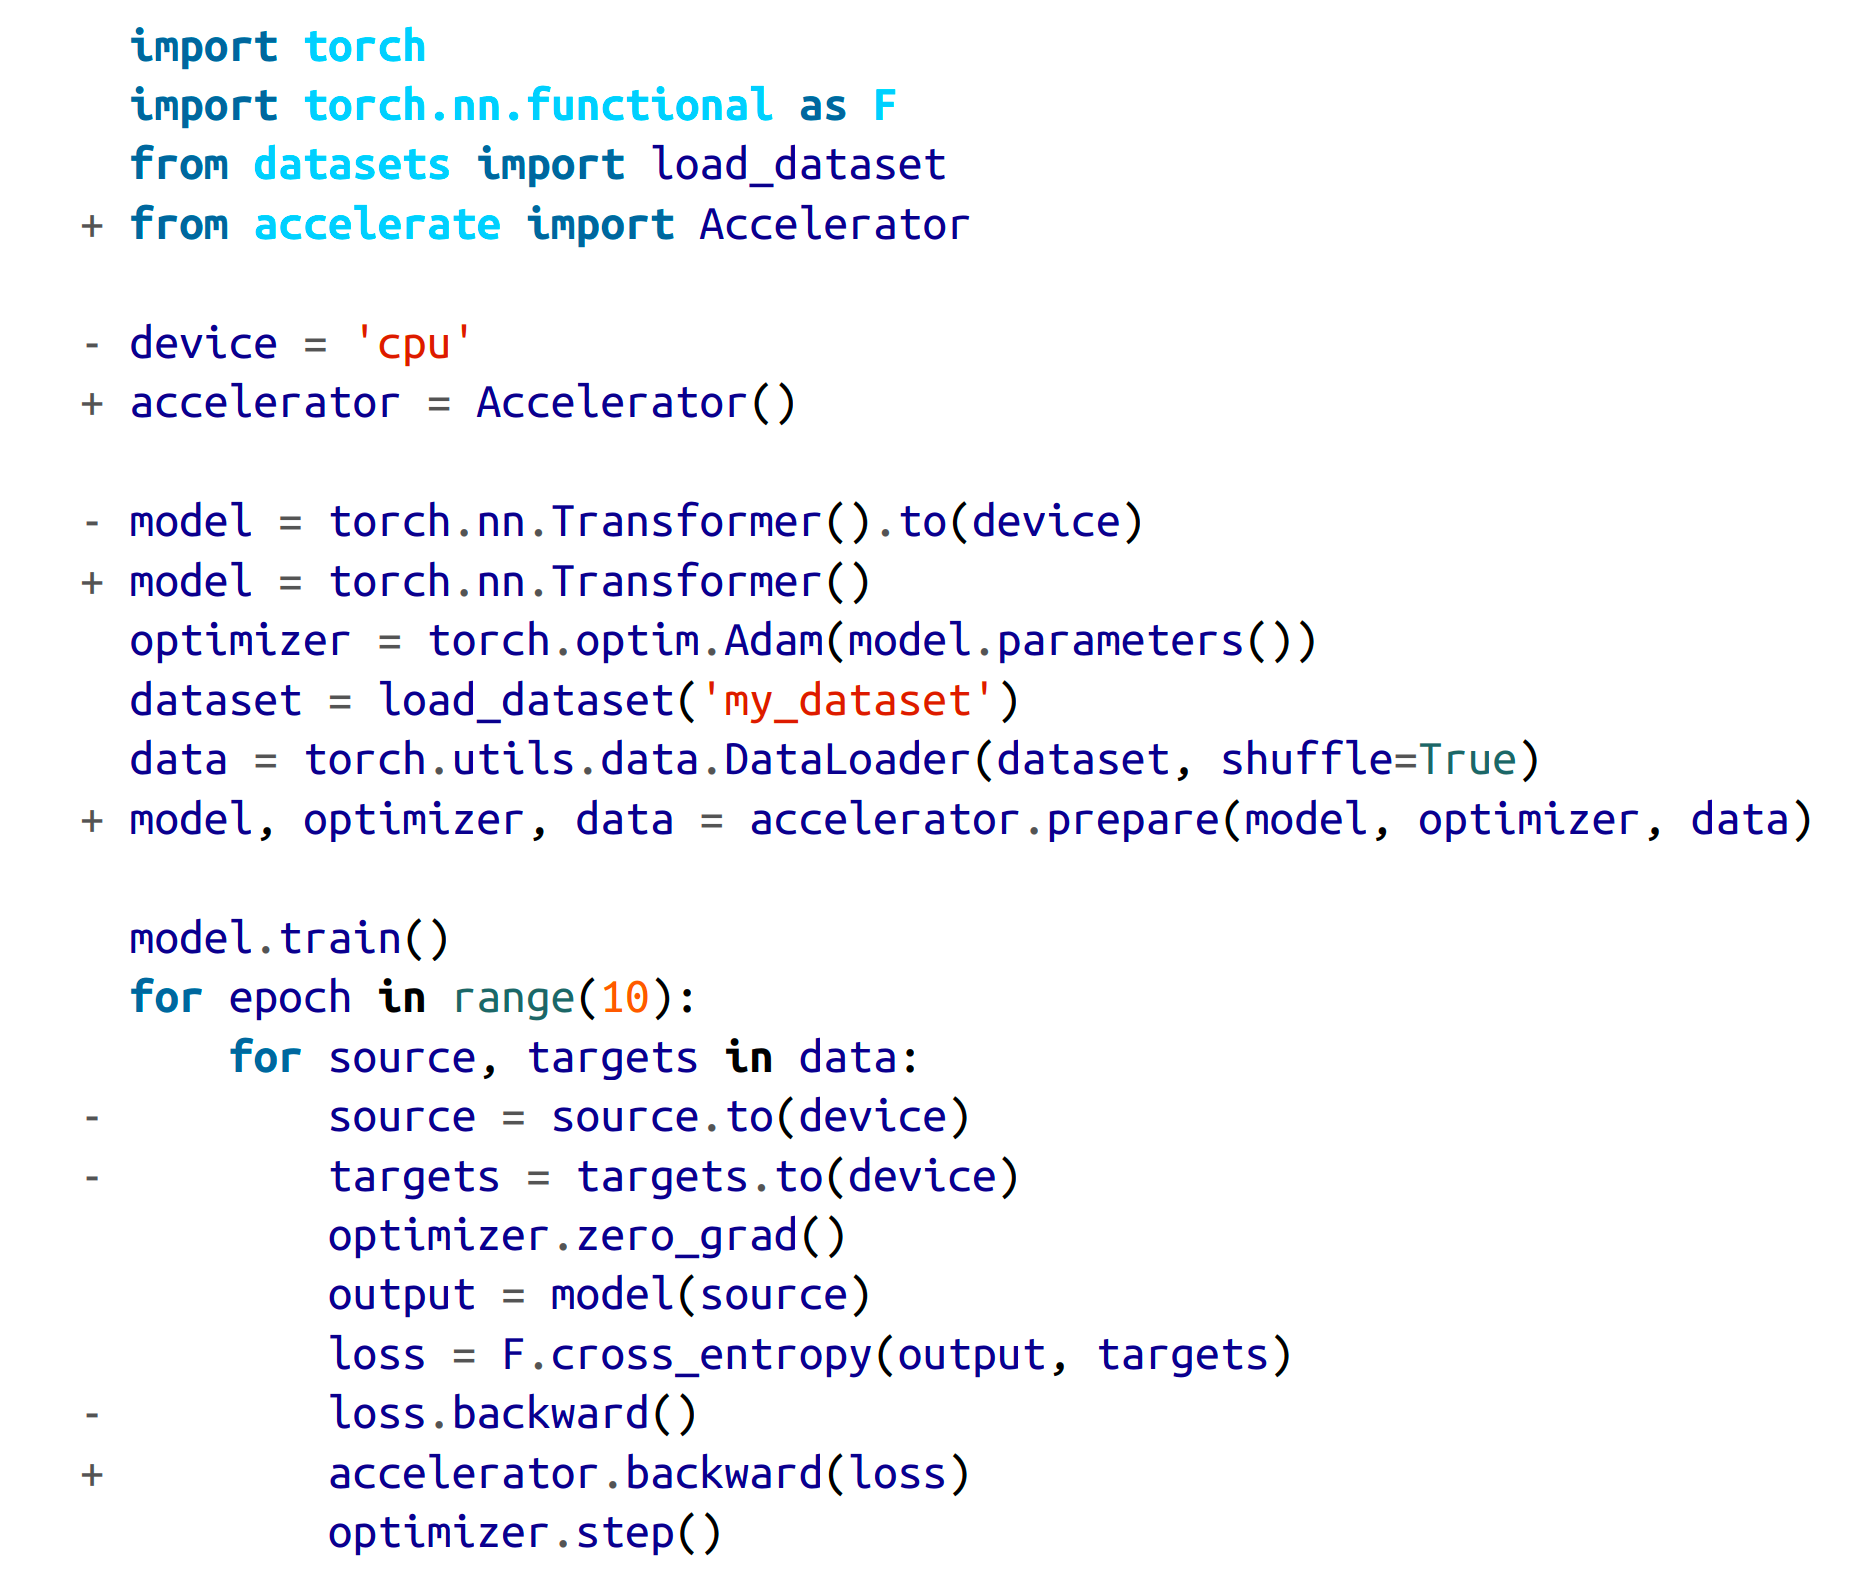

In [4]:
Image('../../imgs/accelerate.png', width=500)


- `$ accelerate config`：交互式地配置 accelerate
    - 最终会写入 `~/.cache/huggingface/accelerate/default_config.yaml`

```
model = accelerator.prepare(model)
model, optimizer = accelerator.prepare(model, optimizer)
model, optimizer, data = accelerator.prepare(model, optimizer, data)
```


- `get_balanced_memory`

```
from accelerate.utils import get_balanced_memory
```

### distributed type

- NO = "NO"
- MULTI_CPU = "MULTI_CPU"
- MULTI_GPU = "MULTI_GPU"
- MULTI_NPU = "MULTI_NPU"
- MULTI_XPU = "MULTI_XPU"

- DEEPSPEED = "DEEPSPEED"
- FSDP = "FSDP"
- TPU = "TPU"
- MEGATRON_LM = "MEGATRON_LM"

### prepare

```
(
    self.model,
    self.optimizer,
    self.data_collator,
    self.dataloader,
    self.lr_scheduler,
) = self.accelerator.prepare(
    self.model,
    self.optimizer,
    self.data_collator,
    self.dataloader,
    self.lr_scheduler,
)
```